In [1]:
from numpy import genfromtxt
from sklearn.manifold import TSNE, JTSNE
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd

In [56]:
# read data
adt_matrix = np.genfromtxt('/data/data_nobackup/hoan/Mimitou/pbmc_nodoubletbycluser_minPts50_adt_pca_preprocessing_by_seurat.csv', delimiter=',');
rna_matrix = np.genfromtxt('/data/data_nobackup/hoan/Mimitou/pbmc_nodoubletbycluster_minPts50_rna_pca_preprocessing_by_seurat.csv', delimiter=','); 
# method = 'CiteFuse' # 'CiteFuse'
method = 'Specter' # 'Specter'
if method == 'Specter':
    y = np.genfromtxt('/data/hoan/Specter/output/pbmc_jointspecter_final_v2.csv', delimiter=',')
    cell_types = ["CD4+CD27+ T", "Naive CD4+ T", "FCGR3A+ Mono", "CD14+ Mono", 
                "CD4+CD27-DR+ T", "CD8+CD27+ T", "CD8+CD27- T", "CD4+CD27-DR- T", "B", "MK", "Effector CD8+ T", "NK"] #stable specter
else:
    y = np.genfromtxt('/data/hoan/Specter/output/pbmc_citefuse_final.csv', delimiter=',')
    cell_types = ["B", "CD8+CD27- T", "Naive CD4+ T", "FCGR3A+ Mono", "CD14+ Mono", "NK", "CD4+CD27+ T", "CD4+CD27- T", "CD8+CD27+ T", "Effector CD8+ T"] #citefuse
labels_true = y.astype(int)

In [57]:
title_fz = 30
dpi = 30
colors = ['cyan','black', 'gold', 'olive', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','magenta','tomato', 'olive',
                 'cyan','black', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive']

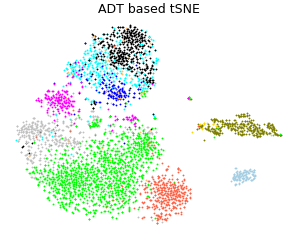

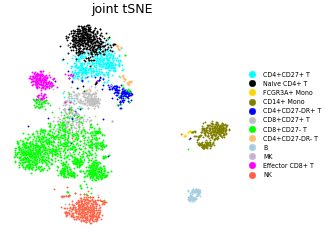

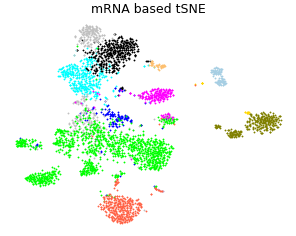

In [58]:
for alpha in [0.0, 0.5, 1.0]:
    if alpha==1.0:
        Z = TSNE(init='pca').fit_transform(rna_matrix)
    elif alpha==0.0:
        Z = TSNE(init='pca').fit_transform(adt_matrix)
    else:
        input_data = {'adt': adt_matrix, 'rna': rna_matrix}
        Z = JTSNE(init = 'pca').fit_transform(X = input_data, method = 'auto', _lambda = 3)

    data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})
    figwidth = 11 if alpha==0.5 else 10
    plt.figure(figsize=(figwidth,8), dpi = dpi) # nolegend: 10, legend: 11
    for label in range(1, len(np.unique(labels_true))+1, 1):
        #add data points 
        i = label-1
        plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                    y=data2.loc[data2['label']==label,'y'], 
                    color=colors[i], 
                    s = 10, label = cell_types[i])
        plt.tight_layout()
        if alpha == 1.0:
            plt.title("mRNA based tSNE", fontdict = {'fontsize' : title_fz})
        elif alpha == 0.0:
            plt.title("ADT based tSNE", fontdict = {'fontsize' : title_fz})
        else:
            plt.title("joint tSNE", fontdict = {'fontsize' : title_fz})
            plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=15, markerscale=5, frameon=False, bbox_to_anchor=(1, 0.5))

        plt.axis('off')
    if alpha == 1.0:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_RNAbasedTsne.pdf', dpi = dpi)
    elif alpha == 0.0:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_ADTbasedTsne.pdf', dpi = dpi)
    else:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_jointTsne.pdf', dpi = dpi)
    plt.show()